In [66]:
import torch
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

plt.rcParams['text.usetex'] = True
torch.set_default_dtype(torch.double)

[-1.  1.]
[0. 1.]


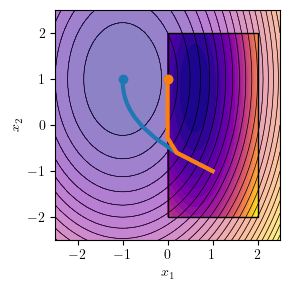

In [67]:
# Define domain
x0 = torch.linspace(-3, 3, steps=100)
x1 = torch.linspace(-3, 3, steps=100)
x = torch.stack(torch.meshgrid(x0, x1, indexing="xy"), dim=2)

# Define constants
xt = torch.tensor([-1.0, 1.0])
Q = torch.tensor([[2.0, 1.0], [1, 1.0]])

# Define function
def f(x):
    dx = x - xt
    return torch.einsum("...i,ij,...j", dx, Q, dx)

def optim_grad(x_init, lr=.1, max_iter=100):
    x = x_init.clone().requires_grad_()

    path = np.zeros((max_iter, 2))
    for i in range(max_iter):
        path[i,:] = x.clone().detach().numpy()
        f(x).backward()
        x.data -= lr * x.grad
        x.grad.zero_()

    return path

def box_constrained_decent(x_init, func, x_lower, x_upper, eta=0.1, max_iter=100):
    x = x_init.clone().requires_grad_()

    points = []
    for _ in range(max_iter):
        points.append([xi.item() for xi in x])
        grad = torch.autograd.grad(func(x).sum(), x)[0]
        x.data -= eta * grad
        x.data = torch.max(torch.min(x.data, x_upper), x_lower)
    return points

s = 2.5
x = np.linspace(-s, s, 100)
y = np.linspace(-s, s, 100)
xx, yy = np.meshgrid(x, y)
xv = np.linspace(0, 2, 100)
yv = np.linspace(-2, 2, 100)
xxv, yyv = np.meshgrid(xv, yv)


vec = torch.tensor(np.column_stack([xx.ravel(), yy.ravel()]))
vecv = torch.tensor(np.column_stack([xx.ravel(), yy.ravel()]))
vec0 = torch.tensor([[1., -1.]])
zz = f(vec).reshape(100,100)
zzv = f(vecv).reshape(100,100)

path = optim_grad(vec0)
path_pg = optim_pg(vec0)
print(path[-1])
print(path_pg[-1])

fig = plt.figure(figsize=(3,3))
plt.contour(xx,yy,zz, levels=25, colors="k", linewidths=0.5)
plt.contourf(xx,yy,zz, levels=25, cmap="plasma", alpha=0.5)
plt.contourf(xxv,yyv,zzv, levels=25, cmap="plasma", vmin=zz.min(), vmax=zz.max())
rect = patches.Rectangle((0, -2), 2, 4, edgecolor="k", facecolor="none", zorder=2)
plt.gca().add_patch(rect)
plt.plot(path[:,0], path[:,1], linewidth=3)
plt.plot(path_pg[:,0], path_pg[:,1], linewidth=3)
plt.plot([x0[0]],[x0[1]] , marker="o", color="tab:blue")
plt.plot([0],[1] , marker="o", color="tab:green")
plt.plot([path_pg[-1][0]],[path_pg[-1][1]] , marker="o", color="tab:orange")
plt.xlim([-s, s])
plt.ylim([-s, s])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.savefig("figures/box_example.pdf", transparent=True)
plt.show()


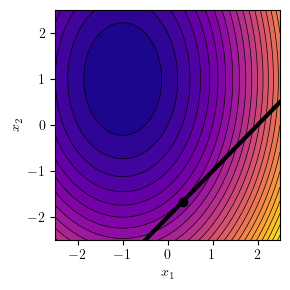

In [68]:
h = lambda x : x - 2

fig = plt.figure(figsize=(3,3))
plt.contour(xx,yy,zz, levels=25, colors="k", linewidths=0.5)
plt.contourf(xx,yy,zz, levels=25, cmap="plasma")
plt.plot(x, h(x), "k", linewidth=3)
plt.plot([1/3],[-5/3] , marker="o", color="k")
plt.xlim([-s, s])
plt.ylim([-s, s])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.savefig("figures/lagrange_example.pdf", transparent=True)
plt.show()

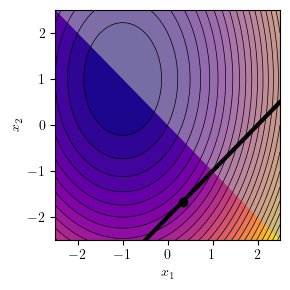

In [77]:
g = lambda x : -x 

fig = plt.figure(figsize=(3,3))
plt.contour(xx,yy,zz, levels=25, colors="k", linewidths=0.5)
plt.contourf(xx,yy,zz, levels=25, cmap="plasma")
plt.plot(x, h(x), "k", linewidth=3)
plt.fill_between(x, 5, g(x), color=(0.7,0.7,0.7,0.6), linewidth=0)
plt.plot([1/3],[-5/3] , marker="o", color="k")
plt.xlim([-s, s])
plt.ylim([-s, s])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.savefig("figures/kkt_example_1.pdf", transparent=True)
plt.show()

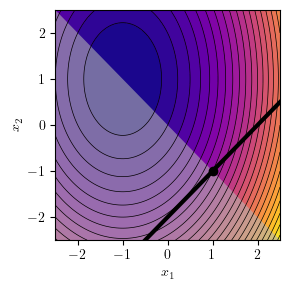

In [78]:
fig = plt.figure(figsize=(3,3))
plt.contour(xx,yy,zz, levels=25, colors="k", linewidths=0.5)
plt.contourf(xx,yy,zz, levels=25, cmap="plasma")
plt.plot(x, h(x), "k", linewidth=3)
plt.fill_between(x, -5, g(x), color=(0.7,0.7,0.7,0.6), linewidth=0)
plt.plot([1],[-1] , marker="o", color="k")
plt.xlim([-s, s])
plt.ylim([-s, s])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.savefig("figures/kkt_example_2.pdf", transparent=True)
plt.show()

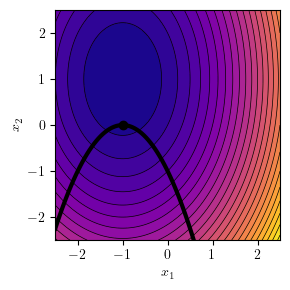

In [79]:
i = lambda x : -(x+1)**2

lbd_star = 2
x_star = -1
y_star = 1-1/2*lbd_star

fig = plt.figure(figsize=(3,3))
plt.contour(xx,yy,zz, levels=25, colors="k", linewidths=0.5)
plt.contourf(xx,yy,zz, levels=25, cmap="plasma")
plt.plot(x, i(x), "k", linewidth=3)
plt.plot([x_star],[y_star] , marker="o", color="k")
plt.xlim([-s, s])
plt.ylim([-s, s])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.savefig("figures/dual_example.pdf", transparent=True)
plt.show()


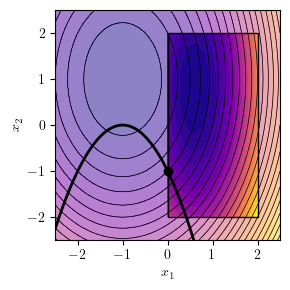

In [82]:
i = lambda x : -(x+1)**2


fig = plt.figure(figsize=(3,3))
plt.contour(xx,yy,zz, levels=25, colors="k", linewidths=0.5)
plt.contourf(xx,yy,zz, levels=25, cmap="plasma", alpha=0.5)
plt.contourf(xxv,yyv,zzv, levels=25, cmap="plasma", vmin=zz.min(), vmax=zz.max())
rect = patches.Rectangle((0, -2), 2, 4, edgecolor="k", facecolor="none", zorder=2)
plt.gca().add_patch(rect)
plt.plot(x, i(x), "k", linewidth=2)
plt.plot([0],[-1] , marker="o", color="k")
plt.xlim([-s, s])
plt.ylim([-s, s])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.savefig("figures/separable_example.pdf", transparent=True)
plt.show()

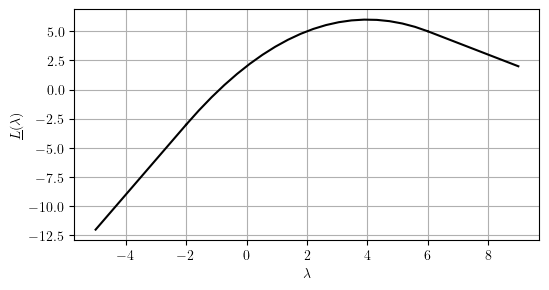

In [81]:
l_1 = np.linspace(-5, -2, 10)
l_2 = np.linspace(-2, 6, 20)
l_3 = np.linspace(6, 9, 10)
f_1 = 3+3*l_1
f_2 = 2 + 2*l_2 - l_2**2/4
f_3 = 11-l_3

fig = plt.figure(figsize=(6,3))
plt.plot(l_1, f_1, "k")
plt.plot(l_2, f_2, "k")
plt.plot(l_3, f_3, "k")
plt.xlabel("$\lambda$")
plt.ylabel("$\\underline{L}(\\lambda)$")
plt.grid()
plt.savefig("figures/dual_function.pdf", transparent=True)
plt.show()

In [74]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots


# def saddle_function(x, y):
#     return x**2 - y**2

# x = np.linspace(-1, 1, 100)
# y = np.linspace(-1, 1, 100)
# xx, yy = np.meshgrid(x, y)
# z = saddle_function(xx, yy)

# fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "surface"}]])
# fig.add_trace(go.Contour(z=z, x=x, y=y, ncontours=25), row=1, col=1)
# fig.add_trace(go.Surface(z=z, x=xx, y=yy), row=1, col=2)
# fig.update_traces(showscale=False)
# fig.update_layout(autosize=False, width=1000, height=500)
# fig.show()